# MUSHROOMS

## Binary Classification

### Imports

In [1]:
import os
import pandas as pd
import numpy as np

import tensorflow as tf
from tensorflow import keras

import matplotlib.pyplot as plt

### Load Data

In [2]:
DATA_PATH = '../DATA/'
FILE_NAME = 'mushrooms.csv'
def load_data(data_path=DATA_PATH, file_name=FILE_NAME):
    csv_path = os.path.join(data_path, file_name)
    return pd.read_csv(csv_path)

dataset = load_data()

### View Data and Informations

In [3]:
dataset.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [4]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   class                     8124 non-null   object
 1   cap-shape                 8124 non-null   object
 2   cap-surface               8124 non-null   object
 3   cap-color                 8124 non-null   object
 4   bruises                   8124 non-null   object
 5   odor                      8124 non-null   object
 6   gill-attachment           8124 non-null   object
 7   gill-spacing              8124 non-null   object
 8   gill-size                 8124 non-null   object
 9   gill-color                8124 non-null   object
 10  stalk-shape               8124 non-null   object
 11  stalk-root                8124 non-null   object
 12  stalk-surface-above-ring  8124 non-null   object
 13  stalk-surface-below-ring  8124 non-null   object
 14  stalk-color-above-ring  

In [5]:
edible, poisonous = dataset['class'].value_counts()

print("Edible:\t  ", edible,"\nPoisonous:", poisonous)

Edible:	   4208 
Poisonous: 3916


In [6]:
# Categorical to numerical
labels = {'e': 0, 'p': 1}
dataset['class'].replace(labels, inplace=True)

edible, poisonous = dataset['class'].value_counts()
print("0 - Edible:   ", edible,"\n1 - Poisonous:", poisonous)

0 - Edible:    4208 
1 - Poisonous: 3916


# NN1 Stalk Root - Rooted (r)

### Split Dataset

#### Get the Labels

In [7]:
X, y =  dataset.drop('class', axis=1), dataset['class'].copy()

print("X:",X.shape,"\ny:",y.shape)

X: (8124, 22) 
y: (8124,)


#### Train Set and Test Set

In [8]:
from sklearn.model_selection import train_test_split
X_white = pd.DataFrame()
X_not_white = pd.DataFrame()
y_white = pd.Series(dtype='float64')
y_not_white = pd.Series(dtype='float64')
for i in range(0,len(X)):
    if X.loc[i,"stalk-root"] == "r":
        X_white = X_white.append(X.iloc[i,:])
        y_white = y_white.append(pd.Series(y.iloc[i]))
    else:
        X_not_white = X_not_white.append(X.iloc[i,:])
        y_not_white = y_not_white.append(pd.Series(y.iloc[i]))

In [9]:
X_train_not_white, X_test_not_white, y_train_not_white, y_test_not_white = train_test_split(X_not_white, y_not_white, test_size=1-(6905/(8124-len(X_white))), random_state=87)

# print(X_test_white)
X_train_white = (X_train_not_white)
# X_test_white = X_white.append(X_test_not_white)
y_train_white = (y_train_not_white)
# y_test_white = y_white.append(y_test_not_white)

In [60]:
from sklearn.utils import shuffle
X_train_full1 = shuffle(X_train_white, random_state=87)
X_test = shuffle(X, random_state=87).iloc[2000:4000]
y_train_full1 = shuffle(y_train_white, random_state=87)
y_test = shuffle(y, random_state=87).iloc[2000:4000]

In [11]:
# print(X_test[:5])
# print(y_test.loc[:,"0"])
# from sklearn.model_selection import train_test_split

# X_train_full, X_test, y_train_full, y_test = train_test_split(X, y, test_size=0.15, random_state=87)

# print("85% - X_train size:", X_train_full.shape[0], " y_train size:", y_train_full.shape[0])
# print("15% - X_test size: ", X_test.shape[0], " y_test size: ", y_test.shape[0])

#### Validation Set

In [61]:
X_valid1, X_train1 = X_train_full1[:500], X_train_full1[500:]
y_valid1, y_train1 = y_train_full1[:500], y_train_full1[500:]

print("X_train:", X_train1.shape[0], "y_train", y_train1.shape[0])
print("X_valid: ", X_valid1.shape[0], "y_valid ", y_valid1.shape[0])
print("X_test: ", X_test.shape[0], "y_test ", X_test.shape[0])


X_train: 6404 y_train 6404
X_valid:  500 y_valid  500
X_test:  2000 y_test  2000


### Prepare the Data

#### Data Transformation

In [62]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OrdinalEncoder
from sklearn.compose import ColumnTransformer

cat_attr_pipeline = Pipeline([
                        ('encoder', OrdinalEncoder())
                    ])

cols = list(X)
pipeline = ColumnTransformer([
                ('cat_attr_pipeline', cat_attr_pipeline, cols)
            ])


X_train1 = pipeline.fit_transform(X_train1)
X_valid1 = pipeline.fit_transform(X_valid1)
X_test1  = pipeline.fit_transform(X_test)

### Neural Network

#### Model

In [63]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import InputLayer, Dense

In [64]:
# tf.random.set_random_seed(87)
tf.random.set_seed(87)

In [65]:
model1 = Sequential([
    InputLayer(input_shape=(22,)),    # input  layer
    Dense(45, activation='relu'),     # hidden layer
    Dense(1,   activation='sigmoid')  # output layer
])

In [66]:
model1.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 45)                1035      
                                                                 
 dense_5 (Dense)             (None, 1)                 46        
                                                                 
Total params: 1,081
Trainable params: 1,081
Non-trainable params: 0
_________________________________________________________________


#### Compile the Model

In [67]:
model1.compile(loss='binary_crossentropy',
             optimizer='sgd',
             metrics=['accuracy'])

#### Prepare Callbacks

In [68]:
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping

checkpoint_cb = ModelCheckpoint('../SavedModels/best_model.h5',
                                save_best_only=True)

early_stopping_cb = EarlyStopping(patience=3,
                                  restore_best_weights=True)

### Training

In [69]:
train_model1 = model1.fit(X_train1, y_train1,
                        epochs=100,
                        validation_data=(X_valid1, y_valid1),
                        callbacks=[checkpoint_cb, early_stopping_cb])
                        


Epoch 1/100
201/201 [==============================] - 1s 2ms/step - loss: 0.4372 - accuracy: 0.8387 - val_loss: 0.3718 - val_accuracy: 0.8720
Epoch 2/100
201/201 [==============================] - 0s 1ms/step - loss: 0.2954 - accuracy: 0.8993 - val_loss: 0.3129 - val_accuracy: 0.8980
Epoch 3/100
201/201 [==============================] - 0s 1ms/step - loss: 0.2501 - accuracy: 0.9144 - val_loss: 0.2848 - val_accuracy: 0.9040
Epoch 4/100
201/201 [==============================] - 0s 1ms/step - loss: 0.2223 - accuracy: 0.9218 - val_loss: 0.3982 - val_accuracy: 0.8760
Epoch 5/100
201/201 [==============================] - 0s 1ms/step - loss: 0.2046 - accuracy: 0.9272 - val_loss: 0.2389 - val_accuracy: 0.9120
Epoch 6/100
201/201 [==============================] - 0s 1ms/step - loss: 0.1844 - accuracy: 0.9336 - val_loss: 0.2169 - val_accuracy: 0.9120
Epoch 7/100
201/201 [==============================] - 0s 1ms/step - loss: 0.1700 - accuracy: 0.9405 - val_loss: 0.2121 - val_accuracy: 0.9180

### Evaluate the Best Model on Test Set

In [70]:
results1 = model1.evaluate(X_test1, y_test)
print("test loss, test acc:", results1)

63/63 [==============================] - 0s 965us/step - loss: 0.0836 - accuracy: 0.9700
test loss, test acc: [0.0835612341761589, 0.9700000286102295]


### Make Some Predictions

In [71]:
X_new1 = X_test1[:5]
y_prob1 = model1.predict(X_new1)
# print(y_prob.round(3))

In [72]:
y_pred1 = (model1.predict(X_new1) > 0.5).astype("int32")
# print(y_pred)
y_test_pred = (model1.predict(X_test1) > 0.5).astype("int32")

## KL Divergence

In [73]:
# X_new = X_test[:5]
X_df1 = pd.DataFrame(model1.predict(X_test1))
y_test_pred1 = pd.DataFrame(y_test_pred).reset_index(drop=True)
X_df1 = pd.concat([X_df1, y_test_pred1], axis=1)
y_test1 = y_test.reset_index(drop=True)
X_df1 = pd.concat([X_df1, y_test1], axis=1)
X_df1.columns = ["X_pred","y_pred","y_actual"]
print(X_df1)

        X_pred  y_pred  y_actual
0     0.003824       0         0
1     0.007150       0         0
2     0.047702       0         0
3     0.000901       0         0
4     0.989958       1         1
...        ...     ...       ...
1995  0.530146       1         1
1996  0.070959       0         0
1997  0.950976       1         1
1998  0.044679       0         0
1999  0.999410       1         1

[2000 rows x 3 columns]


In [74]:
import math
table1 = pd.DataFrame(columns=["KL_div","abs_distance","correctness"])
for i in range(0,len(X_df1)):
    # KL divergence
    p = X_df1.loc[i,"X_pred"]
    try:
        kl = -(p*math.log(p) + (1-p)*math.log(1-p))
    except:
        kl = 0
    table1.loc[i,"KL_div"] = kl
    # absolute distance
    abs_dist = 2*abs(0.5-p)
    table1.loc[i,"abs_distance"] = abs_dist
    # correctness
    y_pred1 = X_df1.loc[i,"y_pred"]
    y_act1 = X_df1.loc[i,"y_actual"]
    if y_pred1 == y_act1:
        table1.loc[i,"correctness"] = 1 # correct prediction
    else:
        table1.loc[i,"correctness"] = 0 # wrong prediction
    table1.loc[i,"y_pred"] = y_pred1

print(table1)

        KL_div abs_distance correctness  y_pred
0     0.025104     0.992352           1     0.0
1     0.042449       0.9857           1     0.0
2     0.191694     0.904595           1     0.0
3     0.007217     0.998198           1     0.0
4     0.056193     0.979916           1     1.0
...        ...          ...         ...     ...
1995  0.691328     0.060293           1     1.0
1996  0.256111     0.858083           1     0.0
1997  0.195633     0.901951           1     1.0
1998  0.182539     0.910642           1     0.0
1999  0.004977      0.99882           1     1.0

[2000 rows x 4 columns]


In [75]:
table1["count"] = 1
correctness1 = table1[["correctness","count"]].groupby(pd.cut(table1["KL_div"], np.arange(0, 0.8, 0.1))).apply(sum)
correctness1["percent"] = 100*(correctness1["correctness"]/correctness1["count"])
print(correctness1)

            correctness  count     percent
KL_div                                    
(0.0, 0.1]         1414   1417   99.788285
(0.1, 0.2]          229    229  100.000000
(0.2, 0.3]           80     83   96.385542
(0.3, 0.4]           63     70   90.000000
(0.4, 0.5]           53     60   88.333333
(0.5, 0.6]           55     61   90.163934
(0.6, 0.7]           46     80   57.500000


Text(0, 0.5, '% correct')

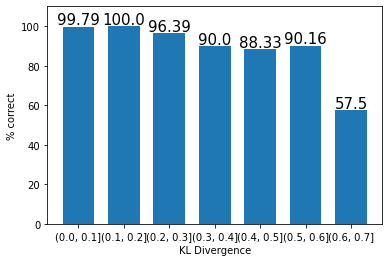

In [76]:
index = []
for i in (correctness1.index):
    index.append(str(i))
plt.bar(index,correctness1["percent"], width=0.7)
for index,data in enumerate(correctness1["percent"]):
    plt.text(x=index , y =data+1 , s=f"{round(data,2)}" , fontdict=dict(fontsize=15),ha='center')
plt.ylim(0,110)
plt.xlabel("KL Divergence")
plt.ylabel("% correct")

### Confidence

Text(0, 0.5, '% correct')

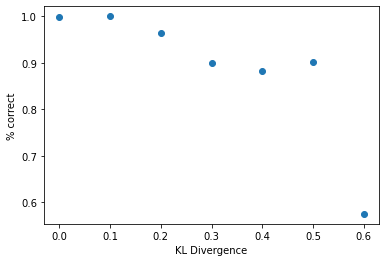

In [77]:
kl1 = table1[["correctness","count"]].groupby(pd.cut(table1["KL_div"], np.arange(0, 0.80, 0.1))).apply(sum)
kl1["percent"] = (kl1["correctness"]/kl1["count"])
kl1.dropna(inplace=True)
plt.scatter(np.arange(0, 0.70, 0.1), kl1["percent"])
plt.xlabel("KL Divergence")
plt.ylabel("% correct")

In [78]:
# Linear Regression
from sklearn.linear_model import LinearRegression

x_reg1 = np.arange(0, 0.70, 0.1).reshape((-1, 1))
y_reg1 = kl1["percent"]
reg_model1 = LinearRegression().fit(x_reg1,y_reg1)

In [79]:
print('intercept(alpha):', reg_model1.intercept_)
print('slope(theta):', reg_model1.coef_)

intercept(alpha): 1.0544471307441485
slope(theta): [-0.55210427]


# NN2 Odor - Almond (a)

#### Train Set and Test Set

In [32]:
from sklearn.model_selection import train_test_split
X_green = pd.DataFrame()
X_not_green = pd.DataFrame()
y_green = pd.Series(dtype='float64')
y_not_green = pd.Series(dtype='float64')
for i in range(0,len(X)):
    if X.loc[i,"odor"] == "a":
        X_green = X_green.append(X.iloc[i,:])
        y_green = y_green.append(pd.Series(y.iloc[i]))
    else:
        X_not_green = X_not_green.append(X.iloc[i,:])
        y_not_green = y_not_green.append(pd.Series(y.iloc[i]))

In [33]:
# X_test_green, X_train_green, y_test_green, y_train_green = train_test_split(X_green, y_green, test_size=1, random_state=87)
X_train_not_green, X_test_not_green, y_train_not_green, y_test_not_green = train_test_split(X_not_green, y_not_green, test_size=1-(6905/(8124-len(X_green))), random_state=87)

# print(X_test_green)
X_train_green = (X_train_not_green)
X_test_green = X_green.append(X_test_not_green)
y_train_green = (y_train_not_green)
y_test_green = y_green.append(y_test_not_green)

In [80]:
from sklearn.utils import shuffle
X_train_full2 = shuffle(X_train_green, random_state=87)
# X_test2 = shuffle(X_test_green, random_state=87)
y_train_full2 = shuffle(y_train_green, random_state=87)
# y_test2 = shuffle(y_test_green, random_state=87)

#### Validation Set

In [81]:
X_valid2, X_train2 = X_train_full2[:500], X_train_full2[500:]
y_valid2, y_train2 = y_train_full2[:500], y_train_full2[500:]

print("X_train:", X_train2.shape[0], "y_train", y_train2.shape[0])
print("X_valid: ", X_valid2.shape[0], "y_valid ", y_valid2.shape[0])
print("X_test: ", X_test.shape[0], "y_test ", X_test.shape[0])


X_train: 6404 y_train 6404
X_valid:  500 y_valid  500
X_test:  2000 y_test  2000


### Prepare the Data

#### Data Transformation

In [82]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OrdinalEncoder
from sklearn.compose import ColumnTransformer

cat_attr_pipeline = Pipeline([
                        ('encoder', OrdinalEncoder())
                    ])

cols = list(X)
pipeline = ColumnTransformer([
                ('cat_attr_pipeline', cat_attr_pipeline, cols)
            ])


X_train2 = pipeline.fit_transform(X_train2)
X_valid2 = pipeline.fit_transform(X_valid2)
X_test2  = pipeline.fit_transform(X_test)
y_test2 = y_test

### Neural Network

#### Model

In [83]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import InputLayer, Dense

In [84]:
# tf.random.set_random_seed(87)
tf.random.set_seed(87)

In [85]:
model2 = Sequential([
    InputLayer(input_shape=(22,)),    # input  layer
    Dense(45, activation='relu'),     # hidden layer
    Dense(1,   activation='sigmoid')  # output layer
])

In [86]:
model2.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 45)                1035      
                                                                 
 dense_7 (Dense)             (None, 1)                 46        
                                                                 
Total params: 1,081
Trainable params: 1,081
Non-trainable params: 0
_________________________________________________________________


#### Compile the Model

In [87]:
model2.compile(loss='binary_crossentropy',
             optimizer='sgd',
             metrics=['accuracy'])

#### Prepare Callbacks

In [88]:
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping

checkpoint_cb = ModelCheckpoint('../SavedModels/best_model.h5',
                                save_best_only=True)

early_stopping_cb = EarlyStopping(patience=3,
                                  restore_best_weights=True)

### Training

In [89]:
train_model2 = model2.fit(X_train2, y_train2,
                        epochs=100,
                        validation_data=(X_valid2, y_valid2),
                        callbacks=[checkpoint_cb, early_stopping_cb])
                        


Epoch 1/100
201/201 [==============================] - 1s 2ms/step - loss: 0.4287 - accuracy: 0.8462 - val_loss: 0.4293 - val_accuracy: 0.8700
Epoch 2/100
201/201 [==============================] - 0s 1ms/step - loss: 0.2840 - accuracy: 0.9024 - val_loss: 0.2692 - val_accuracy: 0.9160
Epoch 3/100
201/201 [==============================] - 0s 1ms/step - loss: 0.2396 - accuracy: 0.9157 - val_loss: 0.2382 - val_accuracy: 0.9120
Epoch 4/100
201/201 [==============================] - 0s 2ms/step - loss: 0.2148 - accuracy: 0.9246 - val_loss: 0.2162 - val_accuracy: 0.9120
Epoch 5/100
201/201 [==============================] - 0s 1ms/step - loss: 0.1982 - accuracy: 0.9250 - val_loss: 0.1995 - val_accuracy: 0.9220
Epoch 6/100
201/201 [==============================] - 0s 1ms/step - loss: 0.1830 - accuracy: 0.9274 - val_loss: 0.1935 - val_accuracy: 0.9320
Epoch 7/100
201/201 [==============================] - 0s 1ms/step - loss: 0.1711 - accuracy: 0.9319 - val_loss: 0.1825 - val_accuracy: 0.9360

### Evaluate the Best Model on Test Set

In [90]:
results2 = model2.evaluate(X_test2, y_test2)
print("test loss, test acc:", results2)

63/63 [==============================] - 0s 1ms/step - loss: 0.1416 - accuracy: 0.9450
test loss, test acc: [0.14162448048591614, 0.9449999928474426]


### Make Some Predictions

In [91]:
X_new2 = X_test2[1100:1110]
y_prob2 = model2.predict(X_new2)
# print(y_prob2.round(3))

In [92]:
y_pred2 = (model2.predict(X_new2) > 0.5).astype("int32")
# print(y_pred2)
y_test_pred2 = (model2.predict(X_test2) > 0.5).astype("int32")

## KL Divergence

In [93]:
# X_new = X_test[:5]
X_df2 = pd.DataFrame(model2.predict(X_test2))
y_test_pred2 = pd.DataFrame(y_test_pred2).reset_index(drop=True)
X_df2 = pd.concat([X_df2, y_test_pred2], axis=1)
y_test2 = y_test2.reset_index(drop=True)
X_df2 = pd.concat([X_df2, y_test2], axis=1)
X_df2.columns = ["X_pred","y_pred","y_actual"]
print(X_df2)

        X_pred  y_pred  y_actual
0     0.004670       0         0
1     0.012465       0         0
2     0.053817       0         0
3     0.001604       0         0
4     0.983223       1         1
...        ...     ...       ...
1995  0.240175       0         1
1996  0.311747       0         0
1997  0.874915       1         1
1998  0.275136       0         0
1999  0.990362       1         1

[2000 rows x 3 columns]


In [94]:
import math
table2 = pd.DataFrame(columns=["KL_div","abs_distance","y_pred","correctness"])
for i in range(0,len(X_df2)):
    # KL divergence
    p = X_df2.loc[i,"X_pred"]
    kl = -(p*math.log(p) + (1-p)*math.log(1-p))
    table2.loc[i,"KL_div"] = kl
    # absolute distance
    abs_dist = 2*abs(0.5-p)
    table2.loc[i,"abs_distance"] = abs_dist
    # correctness
    y_pred = X_df2.loc[i,"y_pred"]
    y_act = X_df2.loc[i,"y_actual"]
    if y_pred == y_act:
        table2.loc[i,"correctness"] = 1 # correct prediction
    else:
        table2.loc[i,"correctness"] = 0 # wrong prediction
    table2.loc[i,"y_pred"] = y_pred

print(table2)

        KL_div abs_distance y_pred correctness
0     0.029719     0.990661      0           1
1     0.067043      0.97507      0           1
2     0.209604     0.892366      0           1
3     0.011922     0.996793      0           1
4     0.085215     0.966446      1           1
...        ...          ...    ...         ...
1995  0.551281     0.519651      0           0
1996  0.620491     0.376506      0           1
1997  0.376936     0.749829      1           1
1998    0.5883     0.449728      0           1
1999  0.054334     0.980723      1           1

[2000 rows x 4 columns]


In [95]:
table2["count"] = 1
correctness2 = table2[["correctness","count"]].groupby(pd.cut(table2["KL_div"], np.arange(0, 0.8, 0.1))).apply(sum)
correctness2["percent"] = 100*(correctness2["correctness"]/correctness2["count"])
print(correctness2)

            correctness  count     percent
KL_div                                    
(0.0, 0.1]         1129   1129  100.000000
(0.1, 0.2]          207    209   99.043062
(0.2, 0.3]          157    162   96.913580
(0.3, 0.4]          110    120   91.666667
(0.4, 0.5]           88     95   92.631579
(0.5, 0.6]           74     99   74.747475
(0.6, 0.7]          125    186   67.204301


Text(0, 0.5, '% correct')

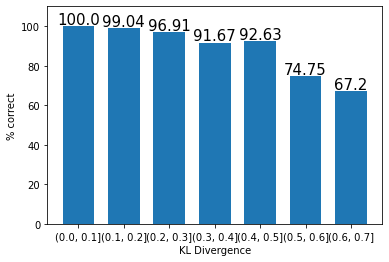

In [96]:
index = []
for i in (correctness2.index):
    index.append(str(i))
plt.bar(index,correctness2["percent"], width=0.7)
for index,data in enumerate(correctness2["percent"]):
    plt.text(x=index , y =data+1 , s=f"{round(data,2)}" , fontdict=dict(fontsize=15),ha='center')
plt.ylim(0,110)
plt.xlabel("KL Divergence")
plt.ylabel("% correct")

### Confidence

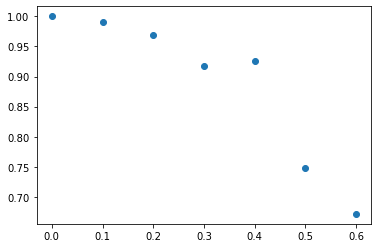

In [97]:
kl2 = table2[["correctness","count"]].groupby(pd.cut(table2["KL_div"], np.arange(0, 0.8, 0.1))).apply(sum)
kl2["percent"] = (kl2["correctness"]/kl2["count"])
kl2.dropna(inplace=True)
plt.scatter(np.arange(0, 0.70, 0.1), kl2["percent"])
# print(kl)
# print(np.arange(0, 0.7, 0.05))

In [98]:
# Linear Regression
from sklearn.linear_model import LinearRegression

x_reg2 = np.arange(0, 0.7, 0.1).reshape((-1, 1))
y_reg2 = kl2["percent"]
reg_model2 = LinearRegression().fit(x_reg2,y_reg2)

In [99]:
print('intercept(alpha):', reg_model2.intercept_)
print('slope(theta):', reg_model2.coef_)

intercept(alpha): 1.0509312408859663
slope(theta): [-0.54021526]


## Algorithm C: It = argmax(Ct,i)

In [100]:
# Correct answer
ans = pd.DataFrame(X_df2["y_actual"])

# NN1
alpha1 = reg_model1.intercept_
theta1 = reg_model1.coef_

# NN2
alpha2 = reg_model2.intercept_
theta2 = reg_model2.coef_

In [101]:
kl_div_table1 = table1[["correctness","count"]].groupby(pd.cut(table1["KL_div"], np.arange(0, 0.8, 0.05))).apply(sum)
kl_div_table1["percent"] = (kl_div_table1["correctness"]/kl_div_table1["count"])

kl_div_table2 = table2[["correctness","count"]].groupby(pd.cut(table2["KL_div"], np.arange(0, 0.8, 0.05))).apply(sum)
kl_div_table2["percent"] = (kl_div_table2["correctness"]/kl_div_table2["count"])
print(kl_div_table2)

             correctness  count   percent
KL_div                                   
(0.0, 0.05]        817.0  817.0  1.000000
(0.05, 0.1]        312.0  312.0  1.000000
(0.1, 0.15]        118.0  119.0  0.991597
(0.15, 0.2]         89.0   90.0  0.988889
(0.2, 0.25]         85.0   87.0  0.977011
(0.25, 0.3]         72.0   75.0  0.960000
(0.3, 0.35]         61.0   66.0  0.924242
(0.35, 0.4]         49.0   54.0  0.907407
(0.4, 0.45]         41.0   43.0  0.953488
(0.45, 0.5]         47.0   52.0  0.903846
(0.5, 0.55]         39.0   51.0  0.764706
(0.55, 0.6]         35.0   48.0  0.729167
(0.6, 0.65]         38.0   55.0  0.690909
(0.65, 0.7]         87.0  131.0  0.664122
(0.7, 0.75]          0.0    0.0       NaN


In [102]:
# Creating NN tables
nn1 = table1.drop(["abs_distance","correctness"], axis=1)
nn1["conf"] = 1 + theta1 * nn1["KL_div"]

# for i in range(0,len(nn1)):
#     nn1.loc[i,"conf"] = kl_div_table1.loc[nn1.loc[i,"KL_div"],"percent"]

nn2 = table2.drop(["abs_distance","correctness"], axis=1)
nn2["conf"] = 1 + theta2 * nn2["KL_div"]

# for i in range(0,len(nn2)):
#     nn2.loc[i,"conf"] = kl_div_table2.loc[nn2.loc[i,"KL_div"],"percent"]
nn1

,KL_div,y_pred,count,conf
0,0.025104,0.0,1,0.98614
1,0.042449,0.0,1,0.976564
2,0.191694,0.0,1,0.894165
3,0.007217,0.0,1,0.996015
4,0.056193,1.0,1,0.968975
...,...,...,...,...
1995,0.691328,1.0,1,0.618315
1996,0.256111,0.0,1,0.8586
1997,0.195633,1.0,1,0.89199
1998,0.182539,0.0,1,0.899219


In [103]:
# Determing higher confidence NN and choosing that arm

for i in range(0,len(nn1)):
    if nn1.loc[i,"conf"] > nn2.loc[i,"conf"]:
        ans.loc[i,"y_pred"] = nn1.loc[i,"y_pred"]
        ans.loc[i,"chosen_NN"] = 1
        ans.loc[i,"chosen_conf"] = nn1.loc[i,"conf"]

        ans.loc[i,"not_NN"] = 2
        ans.loc[i,"not_conf"] = nn2.loc[i,"conf"]
    else:
        ans.loc[i,"y_pred"] = nn2.loc[i,"y_pred"]
        ans.loc[i,"chosen_NN"] = 2
        ans.loc[i,"chosen_conf"] = nn2.loc[i,"conf"]

        ans.loc[i,"not_NN"] = 1
        ans.loc[i,"not_conf"] = nn1.loc[i,"conf"]

ans

,y_actual,y_pred,chosen_NN,chosen_conf,not_NN,not_conf
0,0,0.0,1.0,0.986140,2.0,0.983945
1,0,0.0,1.0,0.976564,2.0,0.963782
2,0,0.0,1.0,0.894165,2.0,0.886768
3,0,0.0,1.0,0.996015,2.0,0.993560
4,1,1.0,1.0,0.968975,2.0,0.953965
...,...,...,...,...,...,...
1995,1,0.0,2.0,0.702190,1.0,0.618315
1996,0,0.0,1.0,0.858600,2.0,0.664801
1997,1,1.0,1.0,0.891990,2.0,0.796373
1998,0,0.0,1.0,0.899219,2.0,0.682191


#### Comparing performance

In [106]:
wrong_record = ""
# NN1 performance
cost1 = 0
for i in range(0,len(nn1)):
    if nn1.loc[i,"y_pred"] != ans.loc[i,"y_actual"]:
        # cost1 += 1 * nn1.loc[i,"conf"]
        cost1 += 1
    else:
        pass

# NN2 performance
cost2 = 0
for i in range(0,len(nn2)):
    if nn2.loc[i,"y_pred"] != ans.loc[i,"y_actual"]:
        # cost2 += 1 * nn2.loc[i,"conf"]
        cost2 += 1
    else:
        pass

# Combined performance
cost3 = 0
for i in range(0,len(nn1)):
    chosen_nn = int(ans.loc[i,"chosen_NN"])
    chosen_nn_conf = round(ans.loc[i,"chosen_conf"],3)
    not_nn = int(ans.loc[i,"not_NN"])
    not_nn_conf = round(ans.loc[i,"not_conf"],3)
    if ans.loc[i,"y_pred"] != ans.loc[i,"y_actual"]:
        cost3 += 1
        # cost3 += 1 * ans.loc[i,"chosen_conf"]
        wrong_record = wrong_record + (f"{i}: Wrong NN:{chosen_nn}, Conf:{chosen_nn_conf} - Other NN{not_nn}, Conf:{not_nn_conf} ") + "\n"
    else:
        pass

In [107]:
print(wrong_record)
print(f"Error count for NN1:{cost1}, NN2:{cost2}, Combined:{cost3}")


8: Wrong NN:1, Conf:0.757 - Other NN2, Conf:0.648 
72: Wrong NN:2, Conf:0.721 - Other NN1, Conf:0.622 
119: Wrong NN:2, Conf:0.831 - Other NN1, Conf:0.665 
127: Wrong NN:2, Conf:0.689 - Other NN1, Conf:0.666 
226: Wrong NN:2, Conf:0.681 - Other NN1, Conf:0.653 
234: Wrong NN:2, Conf:0.804 - Other NN1, Conf:0.62 
271: Wrong NN:2, Conf:0.688 - Other NN1, Conf:0.653 
292: Wrong NN:1, Conf:0.877 - Other NN2, Conf:0.695 
317: Wrong NN:2, Conf:0.714 - Other NN1, Conf:0.62 
346: Wrong NN:2, Conf:0.817 - Other NN1, Conf:0.619 
353: Wrong NN:2, Conf:0.749 - Other NN1, Conf:0.729 
386: Wrong NN:2, Conf:0.744 - Other NN1, Conf:0.618 
397: Wrong NN:2, Conf:0.745 - Other NN1, Conf:0.619 
444: Wrong NN:2, Conf:0.628 - Other NN1, Conf:0.621 
471: Wrong NN:2, Conf:0.829 - Other NN1, Conf:0.623 
515: Wrong NN:2, Conf:0.739 - Other NN1, Conf:0.709 
578: Wrong NN:2, Conf:0.652 - Other NN1, Conf:0.621 
601: Wrong NN:2, Conf:0.722 - Other NN1, Conf:0.631 
624: Wrong NN:2, Conf:0.682 - Other NN1, Conf:0.658